# Туториал: Использование DeepfakePredictor

Этот ноутбук демонстрирует полный цикл работы с модулем `swapping` для предсказания дипфейков.

Мы выполним следующие шаги:
1.  Импортируем необходимые модули.
2.  Настроим логгер.
3.  Определим пути к моделям и тестовому изображению.
4.  Отобразим тестовое изображение.
5.  Инициализируем `DeepfakePredictor`.
6.  Запустим предсказание.
7.  Выведем результат в отформатированном виде.

## 1. Импорты

In [11]:
import json
import logging
import sys
import os
from IPython.display import display, Image as IPImage

notebook_dir = os.path.abspath(os.getcwd())
project_root = os.path.dirname(notebook_dir)

if project_root not in sys.path:
    sys.path.insert(0, project_root)

os.chdir(project_root)

print(f"Текущая рабочая директория (корень проекта): {os.getcwd()}")

try:
    from swapping.predictor import DeepfakePredictor
    from swapping.logger_setup import setup_logger
    from swapping.exceptions import SwappingError
except ModuleNotFoundError as e:
    print(f"Ошибка: Не удалось импортировать 'swapping'.")
    print(f"Убедитесь, что корень проекта '{project_root}' содержит папку 'swapping'.")
    raise e

Текущая рабочая директория (корень проекта): C:\Users\79101\Documents\GitHub\fake_detector


## 2. Настройка логгера

Инициализируем логгер для отслеживания процесса.

In [4]:
setup_logger()
logger = logging.getLogger(__name__)

2025-10-29 20:42:17,180 [INFO ] [               ] Логгер успешно настроен.


## 3. Определение путей

Указываем путь к директории с обученными моделями и путь к тестовому изображению. (Используем пути из `test_face_swap_integration.py`)

In [12]:
MODELS_DIRECTORY = 'swapping/models'
TEST_IMAGE_PATH = 'tests/face_swap_test_data/real.jpg'

logger.info(f"Путь к моделям: {MODELS_DIRECTORY}")
logger.info(f"Путь к тестовому изображению: {TEST_IMAGE_PATH}")

if not os.path.exists(MODELS_DIRECTORY):
    logger.warning(f"Директория с моделями не найдена: {MODELS_DIRECTORY}")
if not os.path.exists(TEST_IMAGE_PATH):
    logger.error(f"Тестовое изображение не найдено: {TEST_IMAGE_PATH}")

2025-10-29 20:53:51,101 [INFO ] [               ] Путь к моделям: swapping/models
2025-10-29 20:53:51,102 [INFO ] [               ] Путь к тестовому изображению: tests/face_swap_test_data/real.jpg


## 4. Отображение тестового изображения

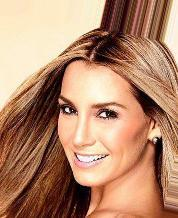

In [13]:
if os.path.exists(TEST_IMAGE_PATH):
    display(IPImage(filename=TEST_IMAGE_PATH, width=300))
else:
    logger.error("Невозможно отобразить изображение, так как оно не найдено.")

## 5. Инициализация и запуск предсказания

Создаем экземпляр `DeepfakePredictor` и вызываем метод `predict`.

In [14]:
result = None
try:
    logger.info(f"Инициализация DeepfakePredictor из {MODELS_DIRECTORY}...")
    predictor = DeepfakePredictor(models_dir=MODELS_DIRECTORY)
    
    logger.info(f"Запуск предсказания для {TEST_IMAGE_PATH}...")
    result = predictor.predict(image_path=TEST_IMAGE_PATH)
    
    logger.info("Предсказание успешно завершено.")

except SwappingError as e:
    logger.error(f"Произошла ошибка в модуле swapping: {e}")
except Exception as e:
    logger.error(f"Произошла непредвиденная критическая ошибка: {e}", exc_info=True)

2025-10-29 20:53:56,052 [INFO ] [               ] Инициализация DeepfakePredictor из swapping/models...
2025-10-29 20:53:56,052 [INFO ] [               ] Используемое устройство: cpu
2025-10-29 20:53:56,103 [INFO ] [               ] Все модели на признаках успешно загружены.
2025-10-29 20:53:56,104 [INFO ] [               ] Загрузка модели EfficientNet для технологии 'github'...
2025-10-29 20:53:56,279 [INFO ] [               ] Загрузка модели EfficientNet для технологии 'rgb'...
2025-10-29 20:53:56,448 [INFO ] [               ] Загрузка модели EfficientNet для технологии 'roop'...
2025-10-29 20:53:56,621 [INFO ] [               ] Загрузка модели EfficientNet для технологии 'segmind'...
2025-10-29 20:53:56,795 [INFO ] [               ] Запуск предсказания для tests/face_swap_test_data/real.jpg...
2025-10-29 20:53:56,796 [DEBUG] [               ] Начало расчета признаков для изображения: tests/face_swap_test_data/real.jpg
2025-10-29 20:53:56,815 [DEBUG] [               ] MediaPipe нашел

## 6. Вывод результата

Печатаем итоговый словарь в читаемом формате JSON.

In [15]:
if result:
    print(json.dumps(result, indent=2, ensure_ascii=False))
else:
    logger.error("Результат не был получен из-за предыдущей ошибки.")

{
  "final_decision": "Real",
  "final_probability": {
    "real_prob": 0.9987743649369818,
    "fake_prob": 0.0012256350630181607
  },
  "base_models_prob": {
    "ef_rf": {
      "real_prob": 0.39169461069253614,
      "fake_prob": 0.6083053893074638
    },
    "fl_rf": {
      "real_prob": 0.5847137540631564,
      "fake_prob": 0.4152862459368436
    },
    "lbp_cb": {
      "real_prob": 0.474870873990048,
      "fake_prob": 0.525129126009952
    },
    "tf_sf_cb": {
      "real_prob": 0.6656794662449232,
      "fake_prob": 0.3343205337550768
    }
  },
  "specialized_effnet_prob": {
    "github": {
      "real_prob": 0.9991618394851685,
      "fake_prob": 0.000838161853607744
    },
    "rgb": {
      "real_prob": 0.7453995943069458,
      "fake_prob": 0.2546003758907318
    },
    "roop": {
      "real_prob": 0.711636483669281,
      "fake_prob": 0.288363516330719
    },
    "segmind": {
      "real_prob": 0.35705670714378357,
      "fake_prob": 0.6429433822631836
    }
  }
}


### Структура результата:

* `final_decision`: Итоговый вердикт ("Fake" или "Real").
* `final_probability`: Вероятности (real/fake) от мета-модели.
* `base_models_prob`: Вероятности от базовых моделей, основанных на признаках (feature-based).
* `specialized_effnet_prob`: Вероятности от специализированных моделей EfficientNet (если они были загружены).